In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Pulling data from below link

In [2]:
url = 'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'

In [3]:
res = requests.get(url)

In [4]:
if res.status_code == 200:
#     print (res.status_code)
    soup = BeautifulSoup(res.content, "html.parser")

### The data needed is in a table so getting its body and assigning to a variable

In [5]:
table = soup.find_all('tbody')
table

[<tbody> <tr> <td style="font-weight: bold; font-size:16px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px">United States</td> <td style="font-weight: bold; text-align:right">164,359</td> <td style="font-weight: bold; text-align:right">3,173</td> <td style="font-size:14px; color:#aaa; text-align:right">North America</td> </tr> <tr> <td style="font-weight: bold; font-size:16px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px">Italy</td> <td style="font-weight: bold; text-align:right">101,739</td> <td style="font-weight: bold; text-align:right">11,591</td> <td style="font-size:14px; color:#aaa; text-align:right">Europe</td> </tr> <tr> <td style="font-weight: bold; font-size:16px; text-align:left; padding-left:5px; padding-top:10px; padding-bottom:10px">Spain</td> <td style="font-weight: bold; text-align:right">94,417</td> <td style="font-weight: bold; text-align:right">8,189</td> <td style="font-size:14px; color:#aaa; text-align:right">E

In [6]:
lst_whole = []
for g in soup.find_all('td'):
    lst_whole.append(g.get_text())
print (lst_whole)

['United States', '164,359', '3,173', 'North America', 'Italy', '101,739', '11,591', 'Europe', 'Spain', '94,417', '8,189', 'Europe', 'China', '81,518', '3,305', 'Asia', 'Germany', '67,051', '650', 'Europe', 'Iran', '44,605', '2,898', 'Asia', 'France', '44,550', '3,024', 'Europe', 'United Kingdom', '22,141', '1,408', 'Europe', 'Switzerland', '15,922', '359', 'Europe', 'Belgium', '12,775', '705', 'Europe', 'Netherlands', '11,750', '864', 'Europe', 'Turkey', '10,827', '168', 'Asia', 'Austria', '9,851', '128', 'Europe', 'South Korea', '9,786', '162', 'Asia', 'Canada', '7,474', '92', 'North America', 'Portugal', '6,408', '140', 'Europe', 'Israel', '4,831', '17', 'Asia', 'Brazil', '4,661', '165', 'South America', 'Australia', '4,557', '19', 'Australia/Oceania', 'Norway', '4,494', '34', 'Europe', 'Sweden', '4,028', '146', 'Europe', 'Czech Republic (Czechia)', '3,002', '24', 'Europe', 'Ireland', '2,910', '54', 'Europe', 'Denmark', '2,815', '77', 'Europe', 'Malaysia', '2,766', '43', 'Asia', 'Ch

### The Data we needed is in four pieces i.e. Country, Cases, Deaths, Region. So below function pulls respective information separately and assign it to a list

In [7]:
lst_countries = []
lst_cases = []
lst_deaths = []
lst_region = []

def get_details():
    i = 0
    while i < len(lst_whole):
        lst_countries.append(lst_whole[i])
        i += 4
        
    j = 1
    while j < len(lst_whole):
        lst_cases.append(lst_whole[j])
        j += 4
        
    k = 2
    while k < len(lst_whole):
        lst_deaths.append(lst_whole[k])
        k += 4
        
    l = 3
    while l < len(lst_whole):
        lst_region.append(lst_whole[l])
        l += 4

In [8]:
get_details()

### Making a DF out of countries list created by above function

In [9]:
df_country = pd.DataFrame(lst_countries, columns=['Country'])
df_country.head()

,Country
0,United States
1,Italy
2,Spain
3,China
4,Germany


### Making DF out of cases list created by above function

In [10]:
df_cases = pd.DataFrame(lst_cases, columns=['Cases'])
df_cases.head()

,Cases
0,"164,359"
1,"101,739"
2,"94,417"
3,"81,518"
4,"67,051"


### Making a DF out of death list created by above function

In [11]:
df_deaths = pd.DataFrame(lst_deaths, columns=['Deaths'])
df_deaths.head()

,Deaths
0,"3,173"
1,"11,591"
2,"8,189"
3,"3,305"
4,650


### Making a DF out of region list created by the above function

In [12]:
df_region = pd.DataFrame(lst_region, columns=['Region'])
df_region.head()

,Region
0,North America
1,Europe
2,Europe
3,Asia
4,Europe


### Combining all the above four DFs into a single DF named df_final

In [13]:
df_final = pd.concat([df_country, df_cases, df_deaths, df_region], axis=1)
df_final.head()

,Country,Cases,Deaths,Region
0,United States,"164,359","3,173",North America
1,Italy,"101,739","11,591",Europe
2,Spain,"94,417","8,189",Europe
3,China,"81,518","3,305",Asia
4,Germany,"67,051",650,Europe


### Showing the list upside down so that lower number of cases and deaths should come to start of list

In [14]:
df_final = df_final.iloc[::-1].reset_index()
df_final

,index,Country,Cases,Deaths,Region
0,200,St. Vincent & Grenadines,1,0,North America
1,199,Timor-Leste,1,0,Asia
2,198,Papua New Guinea,1,0,Australia/Oceania
3,197,Anguilla,2,0,North America
4,196,MS Zaandam,2,0,
5,195,Liberia,3,0,Africa
6,194,Botswana,3,0,Africa
7,193,Belize,3,0,North America
8,192,Somalia,3,0,Africa
9,191,British Virgin Islands,3,0,North America


### Dropping the index column as it was not needed and list already has index assigned

In [15]:
df_final.drop('index', axis=1, inplace=True)

In [16]:
df_final.head()

,Country,Cases,Deaths,Region
0,St. Vincent & Grenadines,1,0,North America
1,Timor-Leste,1,0,Asia
2,Papua New Guinea,1,0,Australia/Oceania
3,Anguilla,2,0,North America
4,MS Zaandam,2,0,


### Graphical represention of Number of Cases, region-wise using bar plot

<BarContainer object of 201 artists>

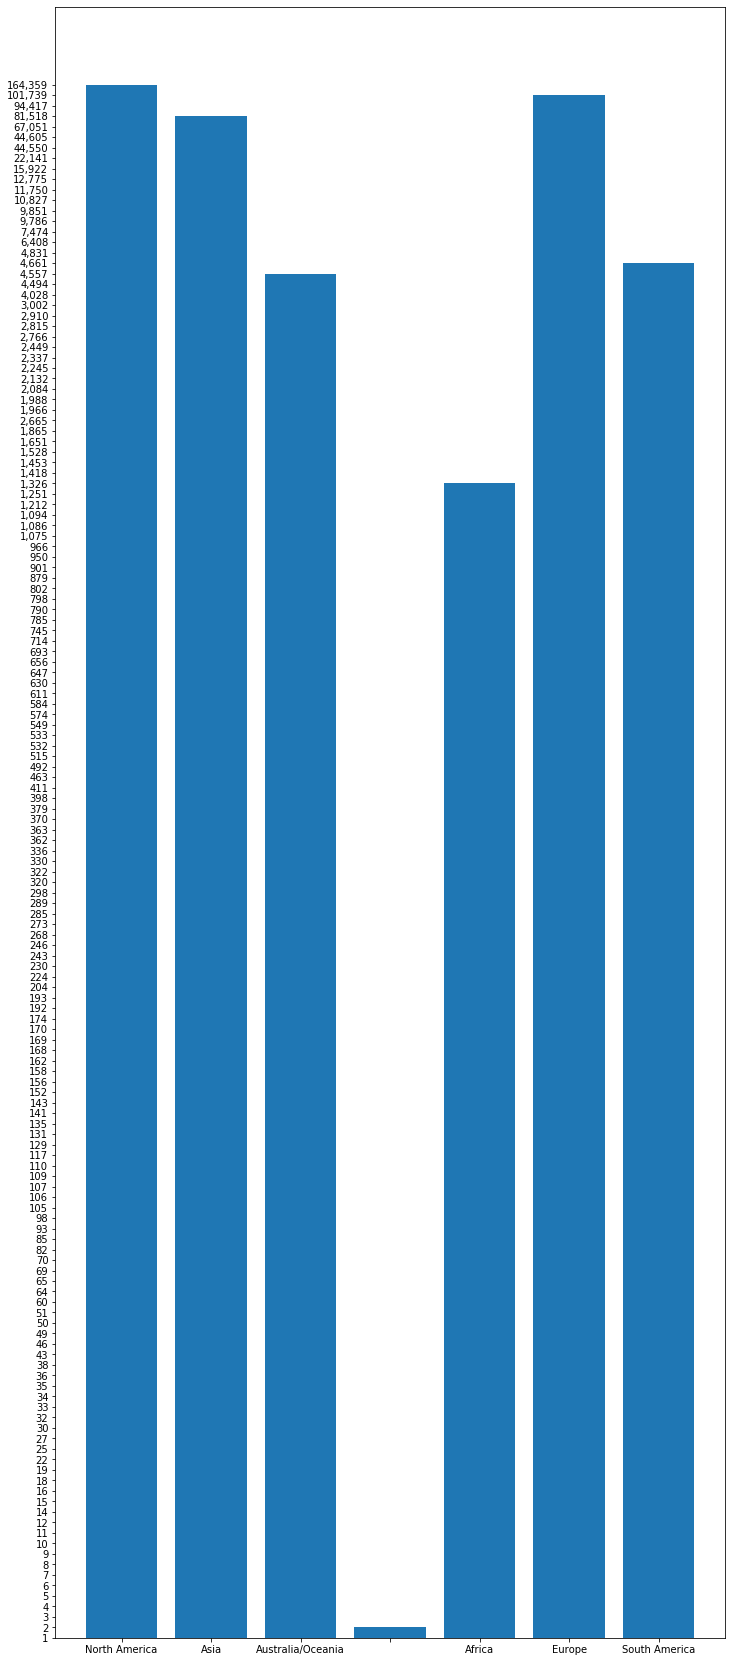

In [25]:
plt.figure(figsize=(12, 30))
plt.bar(df_final['Region'], df_final['Cases'])

### Pulling Asia region from all other regions and creating a new DF out of it

In [18]:
df_final_regionwise = df_final[df_final.Region == 'Asia']
df_final_regionwise.head()

,Country,Cases,Deaths,Region
1,Timor-Leste,1,0,Asia
11,Bhutan,4,0,Asia
17,Nepal,5,0,Asia
35,Laos,9,0,Asia
41,Syria,10,2,Asia


### Displaying the above newly created region-wise DF of Asia to just show Asia's Country wise count of Cases using Bar Plot

<BarContainer object of 47 artists>

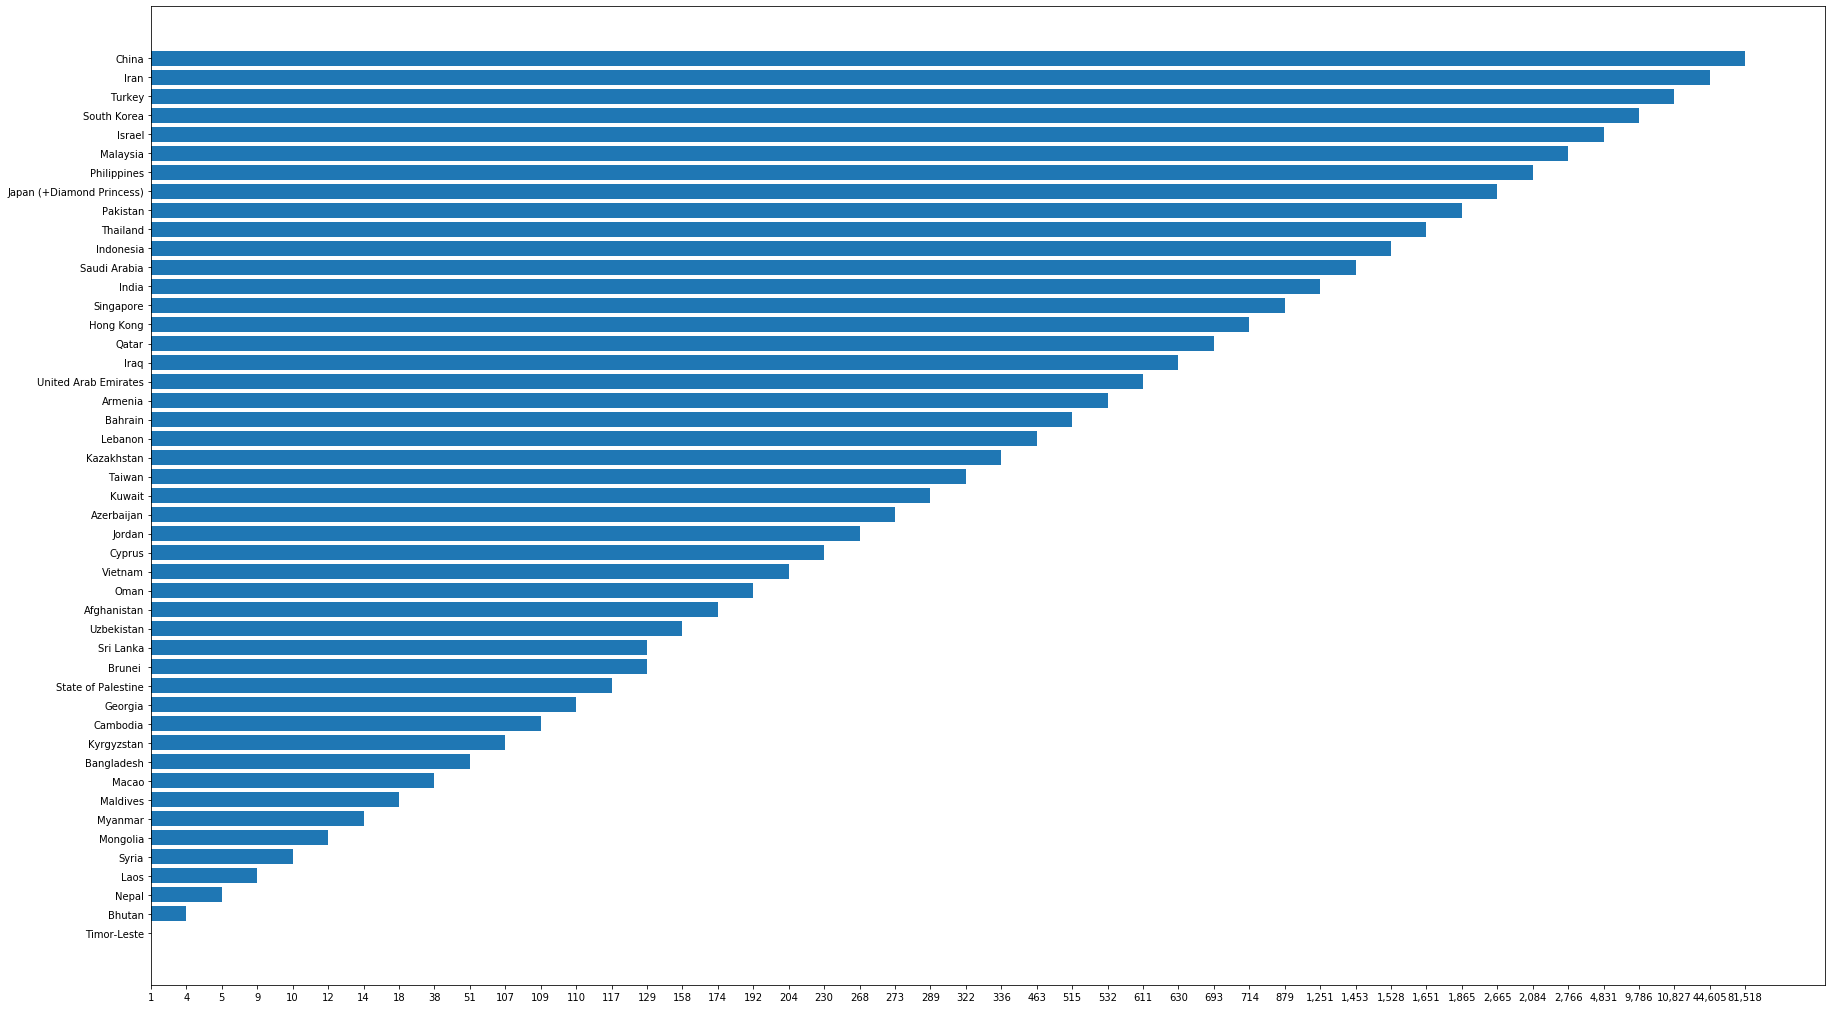

In [19]:
plt.figure(figsize=(30, 18))
plt.barh(df_final_regionwise['Country'], df_final_regionwise['Cases'])